#**Proyecto Inteligencia Artificial I E2**
##**Análisis de tiempos de entrega**
---

##Integrantes:
- Isidro Herrera Rincón - 2210088
- Nestor Javier Clavijo Hernández - 2211629
- Diego Andrés Toscano Zabala - 2201780

---



# <center> **Importar librerías** </center>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
# @title Cargando el dataset para inspecccionarlo
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/deliverytime.csv", sep=",")

Mounted at /content/drive


In [ ]:
# @title **Colums** and **Shape**
print("Columns:")
for i, column in enumerate(df.columns, 1):
    print(f"{i}.{column}")
print()
print("---------------- '°'°'°'°'°'°'°'° ---------------")
print("Shape",df.shape)
print("------------------  Display data -----------------")
df.head(17)

Columns:
1.ID
2.Delivery_person_ID
3.Delivery_person_Age
4.Delivery_person_Ratings
5.Restaurant_latitude
6.Restaurant_longitude
7.Delivery_location_latitude
8.Delivery_location_longitude
9.Type_of_order
10.Type_of_vehicle
11.Time_taken(min)

---------------- '°'°'°'°'°'°'°'° ---------------
Shape (45593, 11)
------------------  Display data -----------------


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
5,9BB4,HYDRES09DEL03,22,4.8,17.431668,78.408321,17.461668,78.438321,Buffet,motorcycle,26
6,95B4,RANCHIRES15DEL01,33,4.7,23.369746,85.339820,23.479746,85.449820,Meal,scooter,40
7,9EB2,MYSRES15DEL02,35,4.6,12.352058,76.606650,12.482058,76.736650,Meal,motorcycle,32
8,1102,HYDRES05DEL02,22,4.8,17.433809,78.386744,17.563809,78.516744,Buffet,motorcycle,34
9,CDCD,DEHRES17DEL01,36,4.2,30.327968,78.046106,30.397968,78.116106,Snack,motorcycle,46


In [ ]:
# @title **Describe**
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


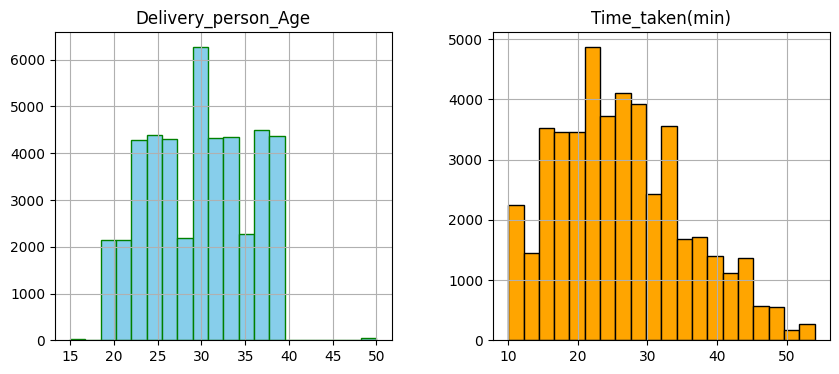

In [ ]:
plt.figure(figsize = (10, 4))
ax= plt.subplot(1,2,1)
df.hist('Delivery_person_Age', ax=ax, bins=20, color='skyblue', edgecolor='green');
ax=plt.subplot(1,2,2)
df.hist('Time_taken(min)', ax=ax, bins=20, color='orange', edgecolor='black');

## Plot de cada una de las columnas


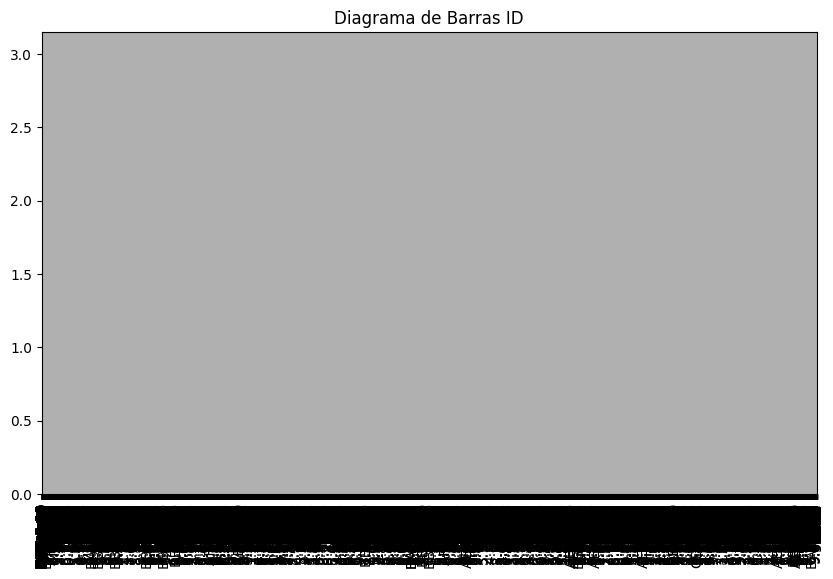

In [ ]:
plt.figure(figsize=(10, 6))
valores = df["ID"].value_counts()
valores.plot.bar()
plt.title("Diagrama de Barras ID")
plt.grid()
plt.show()

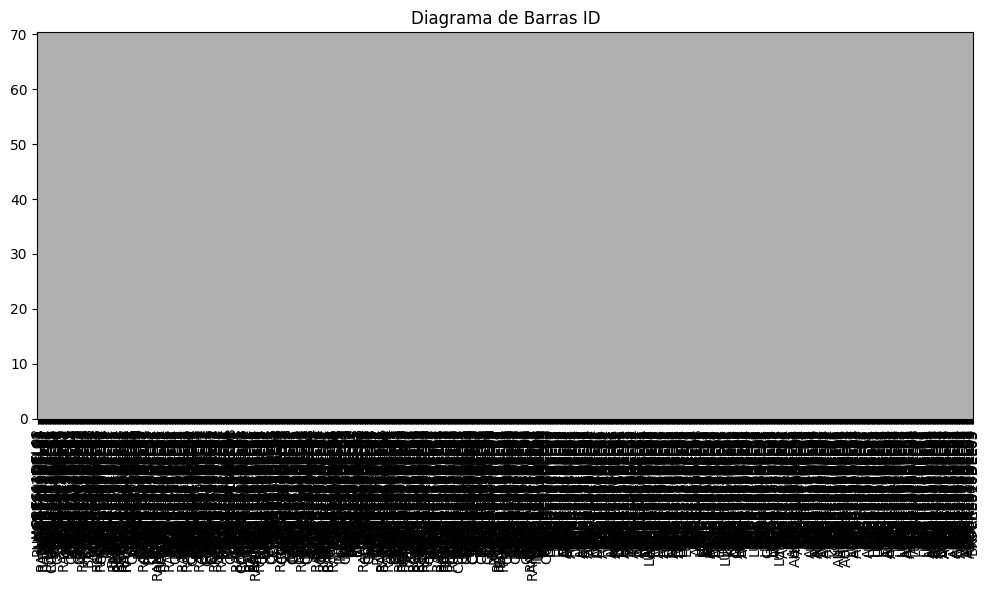

In [ ]:
# Datos
plt.figure(figsize=(10, 6))
valores = df["Delivery_person_ID"].value_counts()
valores.plot.bar()
plt.title("Diagrama de Barras ID")
plt.grid()
plt.tight_layout()
plt.show()

La representación gráfica de los identificadores (IDs) carece de utilidad práctica debido a la ausencia de repeticiones en los IDs. Esto resultaría en una tabla donde los IDs se mostrarían secuencialmente con el mismo valor, lo cual no aporta información significativa.

(1320, 11)


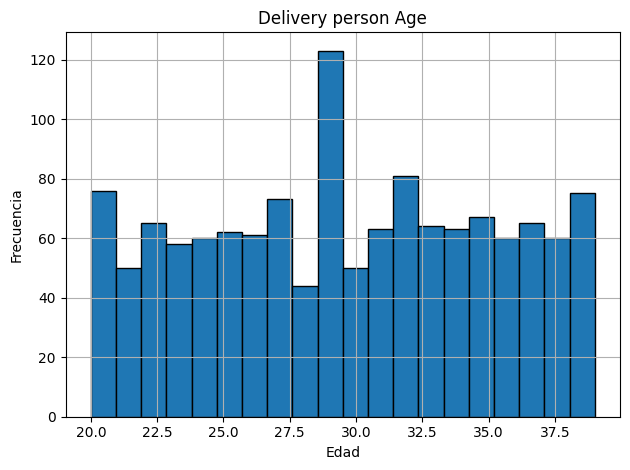

In [ ]:
df2 = df.drop_duplicates("Delivery_person_ID")
print(df2.shape)
edades = df2['Delivery_person_Age']
plt.hist(edades, bins=20,edgecolor='black')
plt.title("Delivery person Age")
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid()
plt.tight_layout()
plt.show()

La distribución de edad de los repartidores muestra que la mayoría se encuentran en el rango de 25 a 40 años. Se observa un pico en la frecuencia alrededor de los 30 años, lo que sugiere que este grupo de edad es el más predominante entre los repartidores. Además, se identifican algunos valores atípicos justo antes de los 50 años y después de los 15 años.

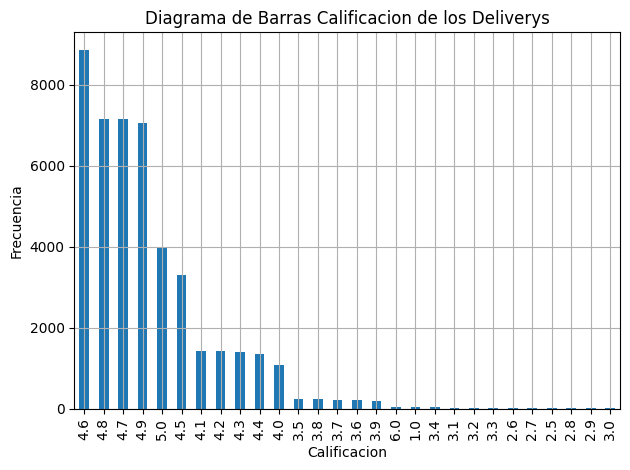

In [ ]:
valores = df["Delivery_person_Ratings"].value_counts()
valores.plot.bar()
plt.title("Diagrama de Barras Calificacion de los Deliverys")
plt.grid()
plt.xlabel('Calificacion')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

La mayoría de los repartidores tienen una calificación entre 4,5 y 5,0. Hay un pico en la frecuencia alrededor de 4.6, lo que indica que esta es la calificación más común para los repartidores. También hay una cantidad significativa de repartidores con calificaciones por encima de 4,5.

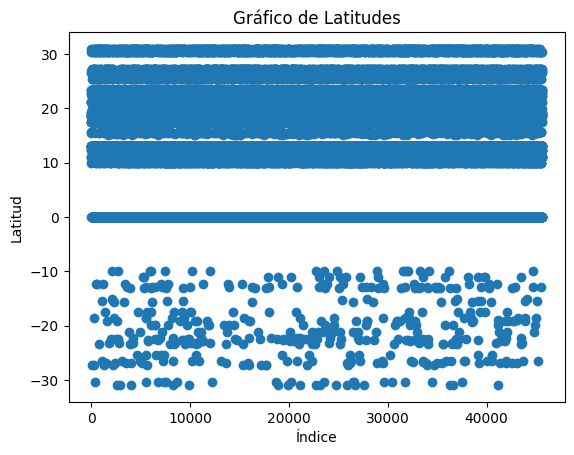

In [ ]:
latitudes = df['Restaurant_latitude']
plt.scatter(latitudes.index, latitudes)
plt.title('Gráfico de Latitudes')
plt.xlabel('Índice')
plt.ylabel('Latitud')
plt.show()

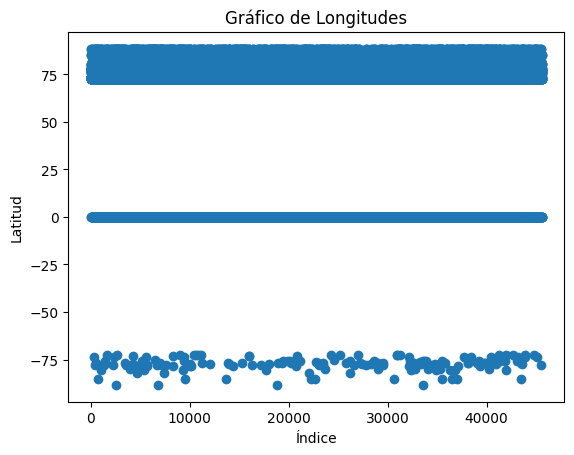

In [ ]:
latitudes = df['Restaurant_longitude']
plt.scatter(latitudes.index, latitudes)
plt.title('Gráfico de Longitudes')
plt.xlabel('Índice')
plt.ylabel('Latitud')
plt.show()

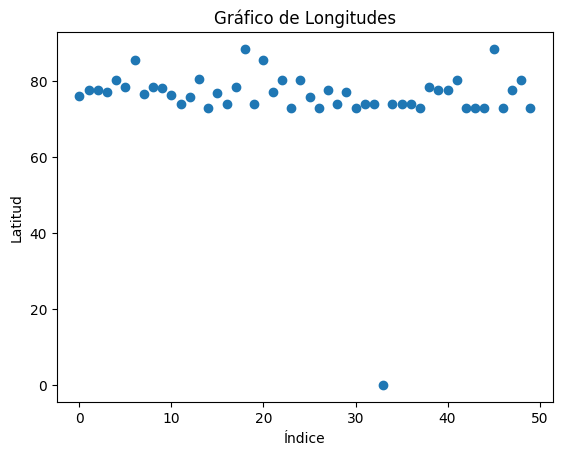

In [ ]:
latitudes = df['Restaurant_longitude'][0:50]
plt.scatter(latitudes.index, latitudes)
plt.title('Gráfico de Longitudes')
plt.xlabel('Índice')
plt.ylabel('Latitud')
plt.show()

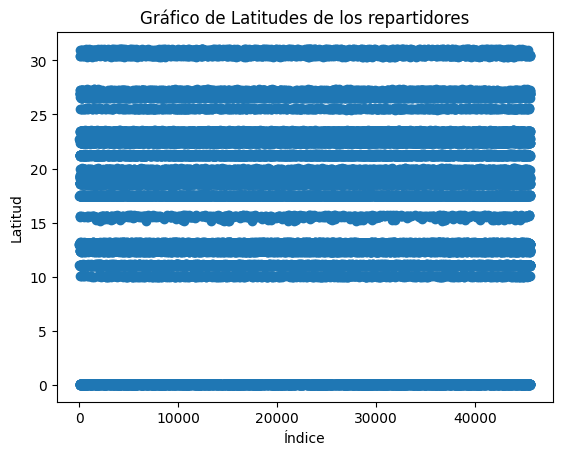

In [ ]:
latitudes = df['Delivery_location_latitude']
plt.scatter(latitudes.index, latitudes)
plt.title('Gráfico de Latitudes de los repartidores')
plt.xlabel('Índice')
plt.ylabel('Latitud')
plt.show()

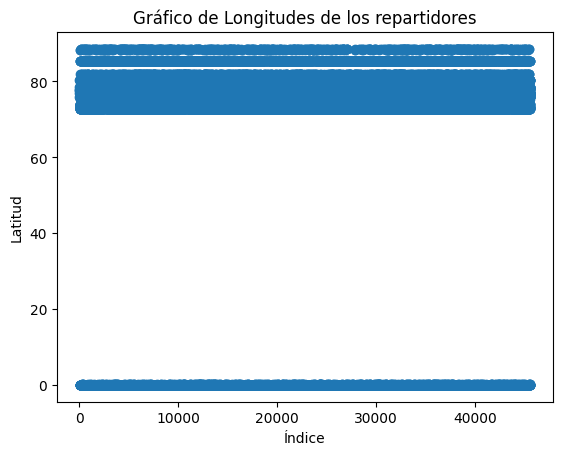

In [ ]:
latitudes = df['Delivery_location_longitude']
plt.scatter(latitudes.index, latitudes)
plt.title('Gráfico de Longitudes de los repartidores')
plt.xlabel('Índice')
plt.ylabel('Latitud')
plt.show()

La representación gráfica de las longitudes y latitudes carece de significado informativo debido a la gran cantidad de valores presentes. La densidad de puntos en el gráfico dificulta la interpretación de cualquier patrón o tendencia.

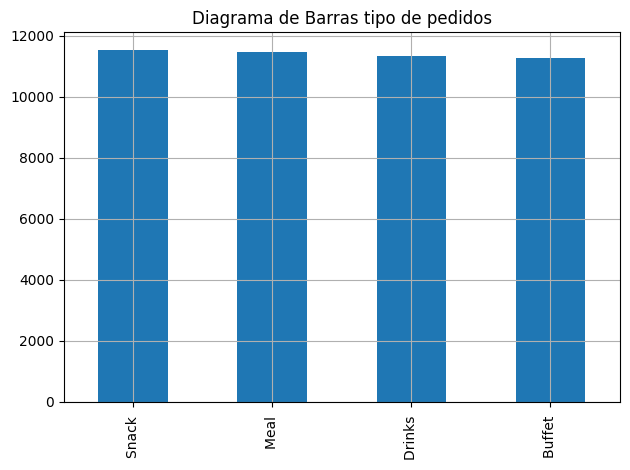

In [ ]:
valores = df["Type_of_order"].value_counts()
valores.plot.bar()
plt.title("Diagrama de Barras tipo de pedidos")
plt.grid()
plt.tight_layout()
plt.show()

La gráfica indica una distribución uniforme en la demanda de cada uno de los productos, ya que se solicita una cantidad similar de cada uno.

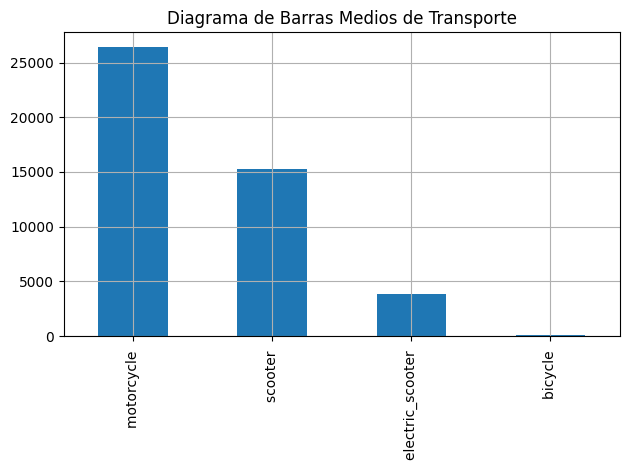

In [ ]:
valores = df["Type_of_vehicle"].value_counts()
valores.plot.bar()
plt.title("Diagrama de Barras Medios de Transporte")
plt.grid()
plt.tight_layout()
plt.show()

La gráfica revela que las motocicletas son el medio preferido por los repartidores, mientras que el uso de bicicletas para realizar entregas es poco común, casi insignificante en comparación.

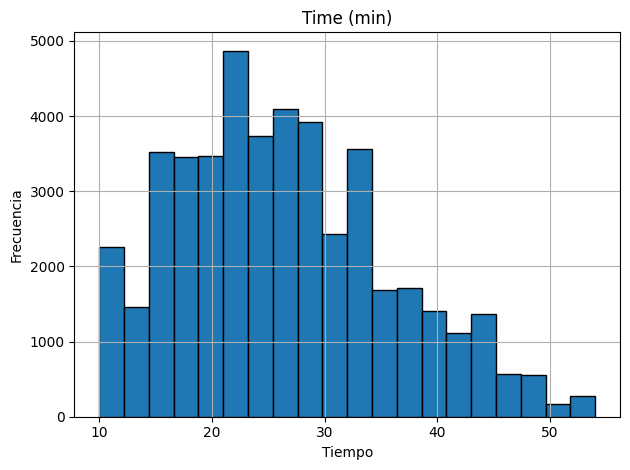

In [ ]:
valores = df["Time_taken(min)"]
plt.hist(valores, bins=20,edgecolor='black')
plt.title("Time (min)")
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.grid()
plt.tight_layout()
plt.show()

La mayoría de los pedidos se completan en un intervalo de tiempo entre 20 y 30 minutos, con un pico destacado alrededor de los 22 minutos, indicando que este es el tiempo más frecuente. Además, se observa que solo un pequeño porcentaje de pedidos excede los 50 minutos de tiempo de entrega.

<Axes: xlabel='Restaurant_latitude', ylabel='Restaurant_longitude'>

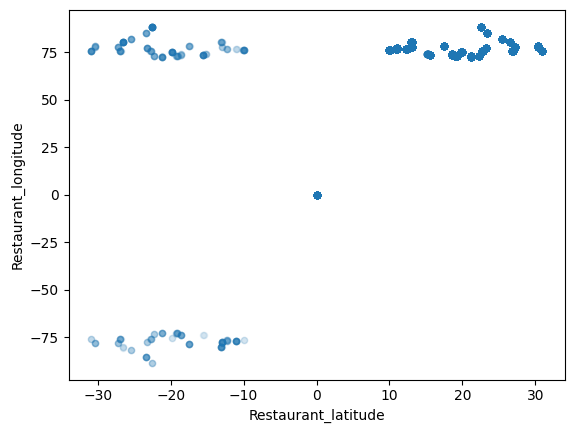

In [ ]:
df.plot(kind="scatter", x="Restaurant_latitude", y="Restaurant_longitude", alpha=0.1)

<Axes: xlabel='Delivery_location_latitude', ylabel='Delivery_location_longitude'>

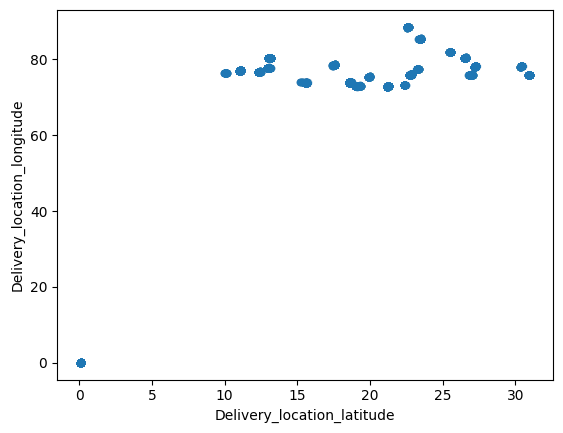

In [ ]:
df.plot(kind="scatter", x="Delivery_location_latitude", y="Delivery_location_longitude", alpha=0.1)

<Axes: xlabel='Delivery_person_Ratings', ylabel='Time_taken(min)'>

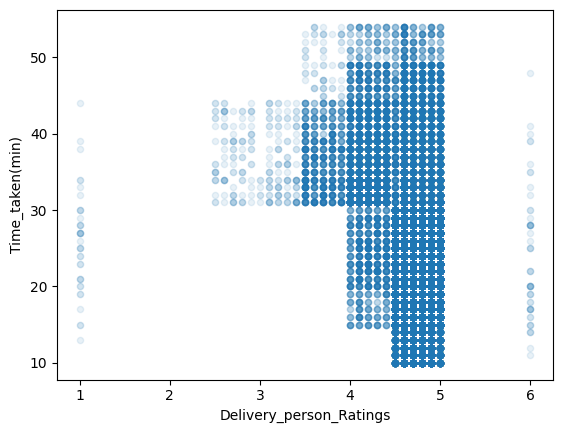

In [ ]:
df.plot(kind="scatter", x="Delivery_person_Ratings", y="Time_taken(min)", alpha=0.1)

Los repartidores que hacen las entregas en el menor tiempo posible son los que menos tienen calificaciones inferiores a 4.5, indicando que los usuarios que solicitan estos servicios de delivery aprecian bastante la puntualidad de parte de los repartidores.


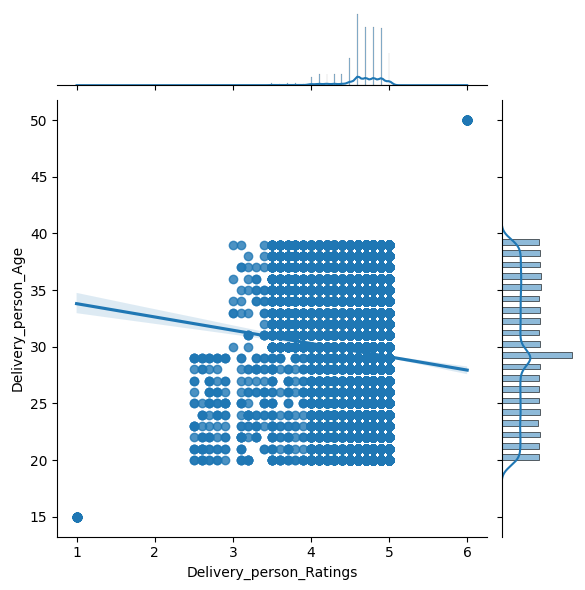

In [ ]:
sns.jointplot(x="Delivery_person_Ratings", y="Delivery_person_Age", data=df, kind='reg');

Según esta gráfica los repartidores mayores a 30 años son menos tendientes a recibir calificaciones negativas o al menos inferiores a 3.

#**Continuación Proyecto Inteligencia Artificial I E2**
##**Análisis de tiempos de entrega**
---

##Integrantes:
- Isidro Herrera Rincón - 2210088
- Nestor Javier Clavijo Hernández - 2211629
- Diego Andrés Toscano Zabala - 2201780

---

In [ ]:
# @title Dataset del proyecto
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/deliverytime.csv", sep=",")
#df = pd.read_csv("/content/drive/MyDrive/Proyecto_IA_1 /deliverytime.csv", sep=",")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [ ]:
# @title Convertir las columnas de coordenadas en distancias con Haversine

# Establecer el radio de la tierra (en kilómetros)
R = 6371

# Convertir grados a radianes
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

# Función para calcular la distancia entre dos puntos mediante la fórmula de Harversine
def distcalculate(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

# Calcular la distancia entre cada par de puntos
df['distance'] = np.nan

for i in range(len(df)):
    df.loc[i, 'distance'] = distcalculate(df.loc[i, 'Restaurant_latitude'], df.loc[i, 'Restaurant_longitude'],df.loc[i, 'Delivery_location_latitude'],df.loc[i, 'Delivery_location_longitude'])



- Explicación [Haversine Formula](https://en.wikipedia.org/wiki/Haversine_formula)
- Código [Haversine formula in Python](https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points)



In [ ]:
#Eliminar columnas categóricas y no categóricas innecesarias
df = df.drop(columns=['ID', 'Delivery_person_ID','Delivery_location_latitude','Delivery_location_longitude','Restaurant_latitude', 'Restaurant_longitude',])
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,37,4.9,Snack,motorcycle,24,3.025149
1,34,4.5,Snack,scooter,33,20.183530
2,23,4.4,Drinks,motorcycle,26,1.552758
3,38,4.7,Buffet,motorcycle,21,7.790401
4,32,4.6,Snack,scooter,30,6.210138


In [ ]:
# @title **Definir un train_test_split (Partición 80/20)**

from sklearn.model_selection import train_test_split

df_aux = df.copy()

#Realizando la partición y eligiendo el "Ground Truth" Time_taken(min)
X = df_aux.drop('Time_taken(min)', axis=1)
y = df_aux['Time_taken(min)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")




X_train shape: (36474, 5)
X_test shape: (9119, 5)
y_train shape: (36474,)
y_test shape: (9119,)


#  **Regression evaluation metrics**


### **1. Mean Squared Error (MSE)**

$$MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})^{2} $$

### **2. Root Mean Squared Error (RMSE)**

$$RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})^{2}} = \sqrt{MSE} $$


### **3. Mean Absolute Error (MAE)**

$$MAE =\frac{1}{N} \sum_{i=1}^{N} |y_i - \hat{y_i}| $$



In [ ]:
# @title **DecisionTreeRegressor con parámetros por defecto**
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

df_aux = df.copy()

var = ['Type_of_order', 'Type_of_vehicle'] # Convirtiendo las columnas categóricas que aportan datos a numéricas
df_new = pd.get_dummies(df_aux[var])
#Concatenando columnas
df_aux = df_aux.drop(columns=var)
df_aux = pd.concat([df_aux, df_new], axis=1)

X = df_aux.drop('Time_taken(min)', axis=1)
y = df_aux['Time_taken(min)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

mse_dt = mean_squared_error(y_test, regressor.predict(X_test))
print("MSE %.3f"% mse_dt)
print("RMSE %.3f"% np.sqrt(mse_dt))
print("MAE %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))



MSE 105.141
RMSE 10.254
MAE 7.920


In [ ]:
# @title **Tunning de parámetros DecisionTreeRegressor: max_depth y criterion**
max_depth =  6#@param {type:"number"}
criterion = 'friedman_mse' #@param ['squared_error', 'poisson', 'absolute_error', 'friedman_mse'] {type:"string"}


X = df_aux.drop('Time_taken(min)', axis=1)
y = df_aux['Time_taken(min)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
regressor = DecisionTreeRegressor(max_depth=max_depth, criterion=criterion, random_state=21)
regressor.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo con métricas de regresión
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calcula RMSE usando squared=False
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

MSE: 53.212
RMSE: 7.295
MAE: 5.736


#####Mejor max_depth = 6              
__Criterion: Squared_error__  
MSE: 53.212,
RMSE: 7.295,
MAE: 5.736

---             
__Criterion: Poisson__  
SE: 53.222,
RMSE: 7.295,
MAE: 5.735

---       

Lento en ejecución      
__Criterion: Absolute_error__  
MSE: 54.796,
RMSE: 7.402,
MAE: 5.705

---     
__Criterion: Friedman_mse__  
MSE: 53.212,
RMSE: 7.295,
MAE: 5.736


In [ ]:
# @title **RandomForestRegressor con parámetros por defecto**

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X = df_aux.drop('Time_taken(min)', axis=1)
y = df_aux['Time_taken(min)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

mse_rf = mean_squared_error(y_test, regressor.predict(X_test))
print("MSE %.3f"% mse_rf)
print("RMSE %.3f"% np.sqrt(mse_rf))
print("MAE %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))



MSE 60.845
RMSE 7.800
MAE 6.093


In [ ]:
# @title **Tunning de parámetros RandomForestRegressor: n_estimators, max_depth y criterion**

n_estimators =  250#@param {type:"number"}
max_depth =  15#@param {type:"number"}
criterion = "absolute_error" #@param ['squared_error', 'poisson', 'absolute_error', 'friedman_mse'] {type:"string"}


X = df_aux.drop('Time_taken(min)', axis=1)
y = df_aux['Time_taken(min)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

regressor = RandomForestRegressor(n_estimators=n_estimators , max_depth=max_depth, criterion=criterion)
regressor.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo con métricas de regresión
y_pred = regressor.predict(X_test)
mse_rfr = mean_squared_error(y_test, y_pred)
rmse_rfr = mean_squared_error(y_test, y_pred, squared=False)  # Calcula RMSE usando squared=False
mae_rfr = mean_absolute_error(y_test, y_pred)

print(f"MSE: {mse_rfr:.3f}")
print(f"RMSE: {rmse_rfr:.3f}")
print(f"MAE: {mae_rfr:.3f}")

MSE: 54.438
RMSE: 7.378
MAE: 5.736


##### Al cambiar los parámetros no se evidencia una mejoría significativa ni un cambio drástico como con DecisionTreeRegressor.            



In [ ]:
# @title **SVR con parámetros por defecto**

#Support Vector Regressor
from sklearn.svm import SVR

X = df_aux.drop('Time_taken(min)', axis=1)
y = df_aux['Time_taken(min)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

estimador = SVR()
estimador.fit(X_train, y_train)

mse = mean_squared_error(y_test, estimador.predict(X_test))
mae = mean_absolute_error(y_test, estimador.predict(X_test))
print("MSE %.3f"% mse)
print("RMSE %.3f"% np.sqrt(mse))
print("MAE %.3f"% mae)

MSE 84.333
RMSE 9.183
MAE 7.393


In [ ]:
# @title **Tunning de parámetros SVR**
Kernel = 'rbf' #@param ['rbf', 'linear', 'poly', 'sigmoid'] {type:"string"}

from sklearn.svm import SVR

X = df_aux.drop('Time_taken(min)', axis=1)
y = df_aux['Time_taken(min)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

SVR = SVR(kernel=Kernel)
SVR.fit(X_train, y_train)

mse = mean_squared_error(y_test, SVR.predict(X_test))
mae = mean_absolute_error(y_test, SVR.predict(X_test))
print("MSE %.3f"% mse)
print("RMSE %.3f"% np.sqrt(mse))
print("MAE %.3f"% mae)

MSE 84.333
RMSE 9.183
MAE 7.393


Lento en ejecución  (50 min)
__Kernel: linear__  
MSE 71.541      
RMSE 8.458       
MAE 6.609

---             
__Kernel: poly__  
MSE 88.213      
RMSE 9.392       
MAE 7.584

---       

__Kernel: rbf__  
MSE 84.333     
RMSE 9.183     
MAE 7.393

---     
__Kernel: sigmoid__  
MSE 14103.358      
RMSE 118.758       
MAE 24.378

In [ ]:
# @title **Arquitectura de red Neuronal Artificial simple con una capa oculta**

import tensorflow as tf

X = df_aux.drop('Time_taken(min)', axis=1)
y = df_aux['Time_taken(min)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(1)
  ])

for i in [10,20,30]:
  model.compile(optimizer=tf.keras.optimizers.SGD(), loss='mae', metrics=['mse'])
  history1 = model.fit(X_train, y_train, epochs=i, verbose=0)
  loss, mse = model.evaluate(X_test, y_test)

  print("Numero de epocas" + str(i))
  print("Loss %.3f"% loss)
  print("RMSE %.3f"% np.sqrt(mse))
  print("\n")


285/285 [==============================] - 1s 2ms/step - loss: 11.1375 - mse: 202.2454
Numero de epocas10
Loss 11.138
RMSE 14.221


285/285 [==============================] - 1s 1ms/step - loss: 6.5033 - mse: 67.2180
Numero de epocas20
Loss 6.503
RMSE 8.199


285/285 [==============================] - 1s 2ms/step - loss: 6.4414 - mse: 67.7112
Numero de epocas30
Loss 6.441
RMSE 8.229




In [ ]:
# @title **Arquitectura de red Neuronal Artificial simple con tres capas ocultas**

import tensorflow as tf

X = df_aux.drop('Time_taken(min)', axis=1)
y = df_aux['Time_taken(min)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(64, activation=tf.nn.relu),
      tf.keras.layers.Dense(32, activation=tf.nn.relu),
      tf.keras.layers.Dense(1)
  ])

for i in [10,20,30]:
  model.compile(optimizer=tf.keras.optimizers.SGD(), loss='mae', metrics=['mse'])
  history2 = model.fit(X_train, y_train, epochs=i, verbose=0)
  loss, mse = model.evaluate(X_test, y_test)

  print("Numero de epocas" + str(i))
  print("Loss %.3f"% loss)
  print("RMSE %.3f"% np.sqrt(mse))
  print("\n")


285/285 [==============================] - 1s 2ms/step - loss: 7.5835 - mse: 88.2161
Numero de epocas10
Loss 7.583
RMSE 9.392


285/285 [==============================] - 1s 2ms/step - loss: 7.6084 - mse: 88.0576
Numero de epocas20
Loss 7.608
RMSE 9.384


285/285 [==============================] - 1s 3ms/step - loss: 7.5821 - mse: 88.7385
Numero de epocas30
Loss 7.582
RMSE 9.420




In [ ]:
# @title **Arquitectura de red Neuronal Artificial simple con seis capas ocultas**

import tensorflow as tf

X = df_aux.drop('Time_taken(min)', axis=1)
y = df_aux['Time_taken(min)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(64, activation=tf.nn.relu),
      tf.keras.layers.Dense(32, activation=tf.nn.relu),
      tf.keras.layers.Dense(32, activation=tf.nn.relu),
      tf.keras.layers.Dense(64, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(1)
  ])

for i in [10,20,30]:
  model.compile(optimizer=tf.keras.optimizers.SGD(), loss='mae', metrics=['mse'])
  history3 = model.fit(X_train, y_train, epochs=i, verbose=0)
  loss, mse = model.evaluate(X_test, y_test)

  print("Numero de epocas" + str(i))
  print("Loss %.3f"% loss)
  print("RMSE %.3f"% np.sqrt(mse))
  print("\n")


285/285 [==============================] - 1s 2ms/step - loss: 7.5832 - mse: 88.2941
Numero de epocas10
Loss 7.583
RMSE 9.396


285/285 [==============================] - 1s 2ms/step - loss: 7.6651 - mse: 88.3786
Numero de epocas20
Loss 7.665
RMSE 9.401


285/285 [==============================] - 1s 2ms/step - loss: 7.5828 - mse: 88.4456
Numero de epocas30
Loss 7.583
RMSE 9.405




In [ ]:
# @title **DecisionTreeRegressor con Cross_val_score**

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *

X = df_aux.drop('Time_taken(min)', axis=1)
y = df_aux['Time_taken(min)']

regressor1 = DecisionTreeRegressor(max_depth=6, criterion="friedman_mse")
regressor2 = DecisionTreeRegressor(max_depth=6, criterion="friedman_mse")

s1 = cross_val_score(regressor1, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
s2 = cross_val_score(regressor2, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_absolute_error))
print ("MSE mean: %.3f (+/- %.5f)"%(np.mean(s1), np.std(s1)))
print ("MSE mean: %.3f (+/- %.5f)"%(np.sqrt(np.mean(s1)), np.std(s1)))
print ("MAE mean: %.3f (+/- %.5f)"%(np.mean(s2), np.std(s2)))

MSE mean: 52.332 (+/- 0.77194)
MSE mean: 7.234 (+/- 0.77194)
MAE mean: 5.695 (+/- 0.07984)


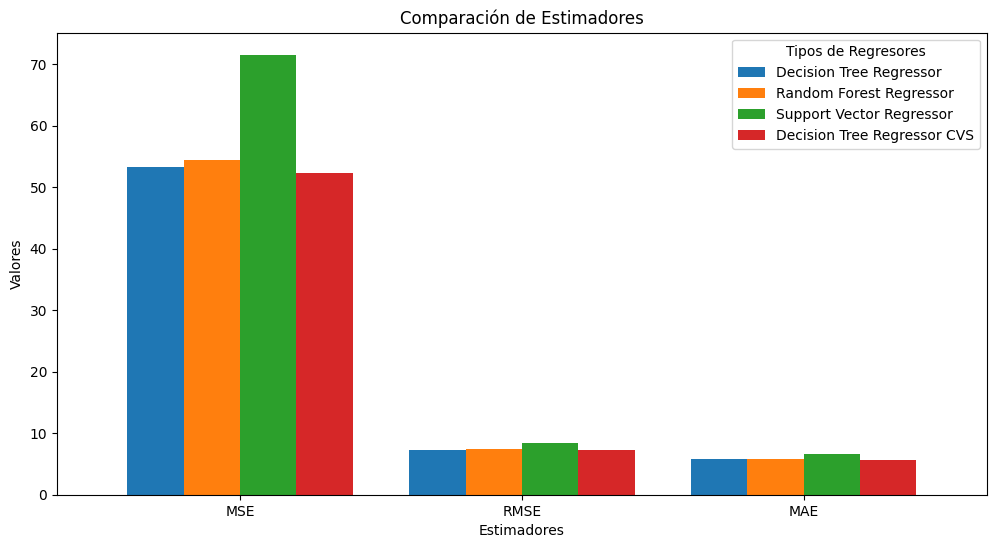

In [ ]:
# @title **Grafica para comparar estimadores**
import pandas as pd
import matplotlib.pyplot as plt

# Crear el DataFrame
data_countries = {
    'Estimador': ['MSE', 'RMSE', 'MAE'],
    'Decision Tree Regressor': [53.212, 7.295, 5.736],
    'Random Forest Regressor': [54.438, 7.378, 5.736],
    'Support Vector Regressor': [71.541, 8.458, 6.609],
    'Decision Tree Regressor CVS': [52.332, 7.234, 5.695]
}

df = pd.DataFrame(data_countries)

# Establecer el índice del DataFrame
df.set_index('Estimador', inplace=True)

# Crear un gráfico de barras
ax = df.plot(kind='bar', figsize=(12, 6), width=0.8)

# Añadir títulos y etiquetas
plt.title('Comparación de Estimadores')
plt.xlabel('Estimadores')
plt.ylabel('Valores')
plt.xticks(rotation=0)  # Gira las etiquetas del eje x para mejor visualización

# Mostrar leyenda
plt.legend(title='Tipos de Regresores')

# Mostrar el gráfico
plt.show()


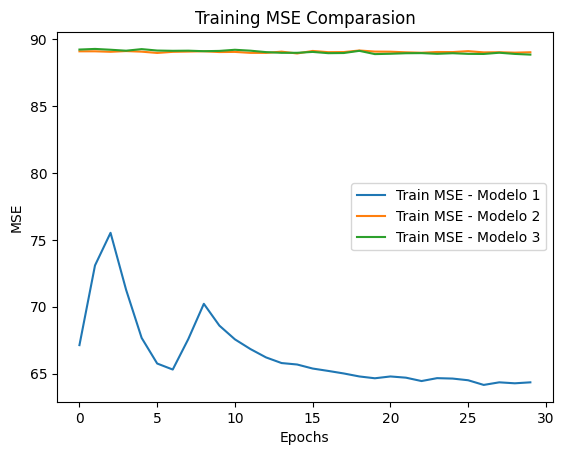

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history1.history['mse'], label='Train MSE - Modelo 1')
plt.plot(history2.history['mse'], label='Train MSE - Modelo 2')
plt.plot(history3.history['mse'], label='Train MSE - Modelo 3')

plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Training MSE Comparasion')
plt.legend()
plt.show()
